<a href="https://colab.research.google.com/github/taticorrea/monografia/blob/master/NS_NEWTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
plt.style.use('seaborn-paper')

In [ ]:
#constantes
hbar = 1.054571726E-34                           #J.s
c = 2.99792458E+8                                #m/s
mn = 1.674928E-27                                #kg

###### caso nao-rel
alfan = 1
betan = 0.7636
gamman = 5/3
un = 1/gamman
e_zeron = 1.603E+37 #J/m3

###### caso rel
alfa = 4.428
beta = 3.374
gamma = 4/3
u = 1/gamma
e_zero = 1.603E+37 #J/m3

34 - (-3) ----- 33 - (-4)

#Caso NÃO-relativistico


In [ ]:
#Passo
hn = 0.5

#Funcoes
def fn(R,P,M):
    return -(alfan*(P**un*M))/(R**2)

def gn(R,P,M):
    return betan*R**2*(P**un)

#Condicoes iniciais
R = 1E-2
M = 0
P = 1E-2

#Print das condicoes iniciais
print('P[0]:',P,' M[0]:',M,'  R[0]:',R)

#Abrindo arquivo e salvando CI
with open('NS-NEWTON_nonrel-35.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
  writter.writerow([P*1E+37,M,R])

#Calculando valores de r
while P > 0:             
  k1Pn = hn*fn(R,       P,              M )    
  k1Mn = hn*gn(R,       P,              M)
  k2Pn = hn*fn(R + hn/2, P + k1Pn/2, M + k1Mn/2)
  k2Mn = hn*gn(R + hn/2, P + k1Pn/2, M + k1Mn/2)
  k3Pn = hn*fn(R + hn/2, P + k2Pn/2, M + k2Mn/2)
  k3Mn = hn*gn(R + hn/2, P + k2Pn/2, M + k2Mn/2)
  k4Pn = hn*fn(R + hn,   P + k3Pn, M + k3Mn)
  k4Mn = hn*gn(R + hn,   P + k3Pn, M + k3Mn)
  with open('NS-NEWTON_nonrel-35.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P*1E+37,M,R])      
    P = P + (1/6)*(k1Pn + 2*k2Pn + 2*k3Pn + k4Pn)
    M = M + (1/6)*(k1Mn + 2*k2Mn + 2*k3Mn + k4Mn)
    R = R + hn
    print('P:',P,' M:',M,'  R:',R)

P[0]: 0.01  M[0]: 0   R[0]: 0.01
P: 0.009840987142659328  M: 0.0021063521172268256   R: 0.51
P: 0.009467586435895002  M: 0.016189983633315398   R: 1.01
P: 0.008880378713649446  M: 0.05291599975053037   R: 1.51
P: 0.00811840422938164  M: 0.12092618407787223   R: 2.01
P: 0.007231086836618063  M: 0.22610348732663885   R: 2.51
P: 0.006272170778027676  M: 0.371111351108382   R: 3.01
P: 0.005294399007753745  M: 0.555243542227124   R: 3.51
P: 0.004344981014837067  M: 0.77458235078233   R: 4.01
P: 0.003462276652677577  M: 1.0224295100570209   R: 4.51
P: 0.0026739280054002283  M: 1.2899482132201823   R: 5.01
P: 0.001996428066029753  M: 1.5669389052818654   R: 5.51
P: 0.0014359111986170705  M: 1.8426670442632596   R: 6.01
P: 0.000989821007762604  M: 2.106666940638284   R: 6.51
P: 0.0006490647897257338  M: 2.3494600006310176   R: 7.01
P: 0.00040028922289962244  M: 2.5631454875467883   R: 7.51
P: 0.00022798675346733487  M: 2.7418446512846586   R: 8.01
P: 0.00011624009494116464  M: 2.88200292199879

TypeError: ignored

In [ ]:
df_34_naorel = pd.read_csv('NS-NEWTON_nonrel-34.csv')
df_33_naorel = pd.read_csv('NS-NEWTON_nonrel-33.csv')
df_32_naorel = pd.read_csv('NS-NEWTON_nonrel-32.csv')
df_31_naorel = pd.read_csv('NS-NEWTON_nonrel-31.csv')

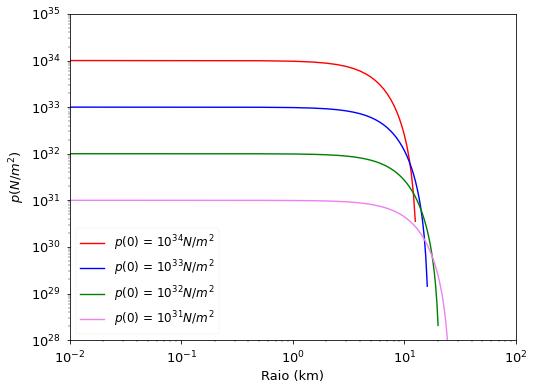

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(df_34_naorel['R (km)'],df_34_naorel['p (N/m2)'],color ='red',label =r'$p(0)$ = $10^{34} N/m^2$')
plt.plot(df_33_naorel['R (km)'],df_33_naorel['p (N/m2)'],color ='blue',label =r'$p(0)$ = $10^{33} N/m^2$')
plt.plot(df_32_naorel['R (km)'],df_32_naorel['p (N/m2)'],color ='green',label =r'$p(0)$ = $10^{32} N/m^2$')
plt.plot(df_31_naorel['R (km)'],df_31_naorel['p (N/m2)'],color ='violet',label =r'$p(0)$ = $10^{31} N/m^2$')
plt.ylabel(r'$p (N/m^2)$',size = 13)
plt.xlim(1E-2,1E+2)
plt.ylim(1E+28,1E+35)
plt.yscale('log')
plt.xscale('log')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('Raio (km)', size = 13)
plt.legend(prop={'size':12})
plt.savefig('rP_nonrel-all-NS.png')
plt.show()

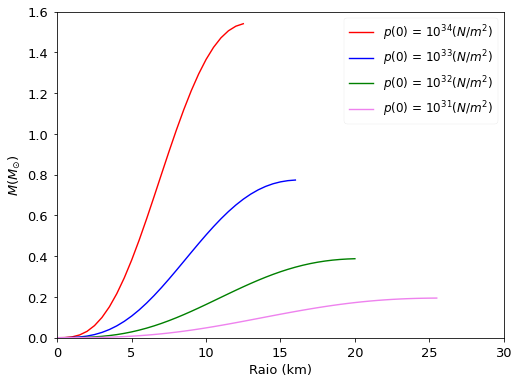

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(df_34_naorel['R (km)'],df_34_naorel['m (Msol)'],color ='red',label =r'$p(0)$ = $10^{34} (N/m^2)$')
plt.plot(df_33_naorel['R (km)'],df_33_naorel['m (Msol)'],color ='blue',label =r'$p(0)$ = $10^{33} (N/m^2)$')
plt.plot(df_32_naorel['R (km)'],df_32_naorel['m (Msol)'],color ='green',label =r'$p(0)$ = $10^{32} (N/m^2)$')
plt.plot(df_31_naorel['R (km)'],df_31_naorel['m (Msol)'],color ='violet',label =r'$p(0)$ = $10^{31} (N/m^2)$')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.ylim(0,1.6)
plt.xlim(0,30)
plt.ylabel(r'$M (M_{\odot})$', size = 13)
plt.xlabel('Raio (km)', size = 13)
plt.legend(prop={'size':12})
plt.savefig('rM_nonrel-all-NS.png')
plt.show()

#Caso relativistico


In [ ]:
#Passo 
h = 0.5 #km

def f(R,P,M):
    return -(alfa*(P**u*M))/(R**2)

def g(R,P,M):
    return beta*R**2*(P**u)

#Condicoes iniciais
R = 1E-2
M = 0
P = 1E-1

print('P[0]:',P,' M[0]:',M,'  R[0]:',R)

with open('NS-NEWTON_rel-36.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
  writter.writerow([P*1E+37,M,R])

while P > 0:
  #Calculando valores de r
  k1P = h*f(R,       P,              M )    
  k1M = h*g(R,       P,              M)
  k2P = h*f(R + h/2, P + k1P/2, M + k1M/2)
  k2M = h*g(R + h/2, P + k1P/2, M + k1M/2)
  k3P = h*f(R + h/2, P + k2P/2, M + k2M/2)
  k3M = h*g(R + h/2, P + k2P/2, M + k2M/2)
  k4P = h*f(R + h,   P + k3P, M + k3M)
  k4M = h*g(R + h,   P + k3P, M + k3M)
  with open('NS-NEWTON_rel-36.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P*1E+37,M,R])      
    #Calculando P+1, M+1 e R
    P = P + (1/6)*(k1P + 2*k2P + 2*k3P + k4P)
    M = M + (1/6)*(k1M + 2*k2M + 2*k3M + k4M)
    R = R + h
    print('P:',P*1e+37,' M:',M,'  R:',R)

P[0]: 0.1  M[0]: 0   R[0]: 0.01
P: 7.767324872470482e+35  M: 0.02018148860130676   R: 0.51
P: 4.681077524576293e+35  M: 0.1385906311749762   R: 1.01
P: 2.186923516440798e+35  M: 0.3406159013981364   R: 1.51
P: 8.682404421620061e+34  M: 0.5499503258643847   R: 2.01
P: 3.1386443251254825e+34  M: 0.7161085479935937   R: 2.51
P: 1.0697265410959858e+34  M: 0.8288084976117704   R: 3.01
P: 3.4632049878678507e+33  M: 0.8974520034142597   R: 3.51
P: 1.0525546797659579e+33  M: 0.9355693349440783   R: 4.01
P: 2.9349623945496878e+32  M: 0.954696258626593   R: 4.51
P: (7.691037537697629e+31-2.1087116429727669e+30j)  M: (0.9629753996801994+0.00010469238352603068j)   R: 5.01


TypeError: ignored

In [ ]:
df_31_rel = pd.read_csv('NS-NEWTON_rel-31.csv')
df_32_rel = pd.read_csv('NS-NEWTON_rel-32.csv')
df_33_rel = pd.read_csv('NS-NEWTON_rel-33.csv')
df_34_rel = pd.read_csv('NS-NEWTON_rel-34.csv')
df_35_rel = pd.read_csv('NS-NEWTON_rel-35.csv')
df_36_rel = pd.read_csv('NS-NEWTON_rel-36.csv')

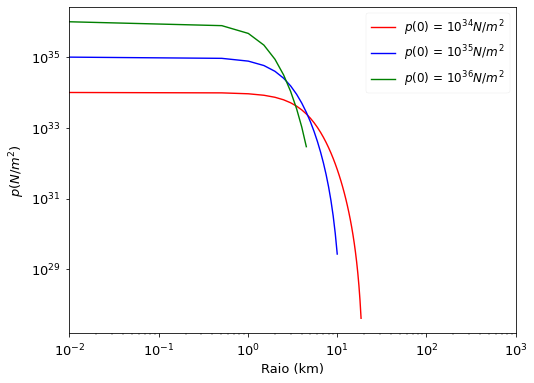

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(df_34_rel['R (km)'],df_34_rel['p (N/m2)'],color ='red',label =r'$p(0)$ = $10^{34} N/m^2$')
plt.plot(df_35_rel['R (km)'],df_35_rel['p (N/m2)'],color ='blue',label =r'$p(0)$ = $10^{35} N/m^2$')
plt.plot(df_36_rel['R (km)'],df_36_rel['p (N/m2)'],color ='green',label =r'$p(0)$ = $10^{36} N/m^2$')
plt.ylabel(r'$p (N/m^2)$', size = 13)
plt.xlim(1E-2,1E+3)
#plt.ylim(1E+18,1E+35)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Raio (km)', size = 13)
plt.legend(prop={'size':12})
plt.savefig('rP_rel-all-NS.png')
plt.show()

In [ ]:
df_36_rel

,p (N/m2),m (Msol),R (km)
0,1.000000e+36,0.000000,0.01
1,1.000000e+36,0.000000,0.01
2,7.767325e+35,0.020181,0.51
3,4.681078e+35,0.138591,1.01
4,2.186924e+35,0.340616,1.51
5,8.682404e+34,0.549950,2.01
6,3.138644e+34,0.716109,2.51
7,1.069727e+34,0.828808,3.01
8,3.463205e+33,0.897452,3.51
9,1.052555e+33,0.935569,4.01


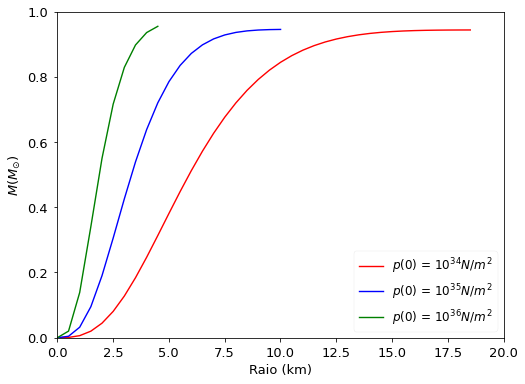

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_34_rel['R (km)'],df_34_rel['m (Msol)'],color ='red',label =r'$p(0)$ = $10^{34} N/m^2$')
plt.plot(df_35_rel['R (km)'],df_35_rel['m (Msol)'],color ='blue',label =r'$p(0)$ = $10^{35} N/m^2$')
plt.plot(df_36_rel['R (km)'],df_36_rel['m (Msol)'],color ='green',label =r'$p(0)$ = $10^{36} N/m^2$')
plt.ylim(0,1)
plt.xlim(0,20)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.ylabel(r'$M (M_{\odot})$',size = 13)
plt.xlabel('Raio (km)', size = 13)
plt.legend(prop={'size':12})
plt.savefig('rM_rel-all-NS.png')
plt.show()

#Plot

##1E-3 (1E+34)

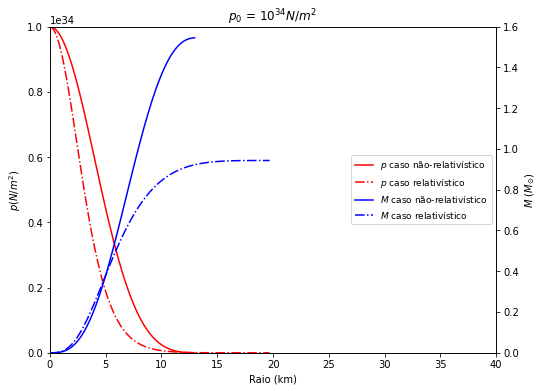

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{34} N/m^2$')
lns1 = ax.plot(df_34_naorel['R (km)'],df_34_naorel['pbar'],color ='red', linestyle='-', label = r'$p$ caso não-relativístico')
lns2 = ax.plot(df_34_rel['R (km)'],df_34_rel['pbar'],color ='red', linestyle='-.', label = r'$p$ caso relativístico')
ax.set_ylabel(r'$p (N/m^2)$')
plt.ylim(0,1E+34)

ax2 = ax.twinx()
lns3 = ax2.plot(df_34_naorel['R (km)'],df_34_naorel['mbar (Msol)'],color ='blue', label = r'$M$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_34_rel['R (km)'],df_34_rel['mbar (Msol)'],color ='blue', label = r'$M$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$M$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,40)
plt.ylim(0,1.6)

fig.savefig('NS-34.png')

##1E-4 (1E+33)
 


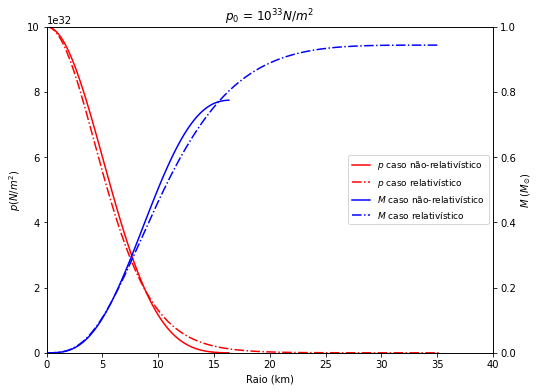

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{33} N/m^2$')
lns1 = ax.plot(df_33_naorel['R (km)'],df_33_naorel['pbar'],color ='red', linestyle='-', label = r'$p$ caso não-relativístico')
lns2 = ax.plot(df_33_rel['R (km)'],df_33_rel['pbar'],color ='red', linestyle='-.', label = r'$p$ caso relativístico')
ax.set_ylabel(r'$p (N/m^2)$')
plt.ylim(0,1E+33)

ax2 = ax.twinx()
lns3 = ax2.plot(df_33_naorel['R (km)'],df_33_naorel['mbar (Msol)'],color ='blue', label = r'$M$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_33_rel['R (km)'],df_33_rel['mbar (Msol)'],color ='blue', label = r'$M$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$M$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,40)
plt.ylim(0,1)

fig.savefig('NS-33.png')

##1E-5 (1E+32)

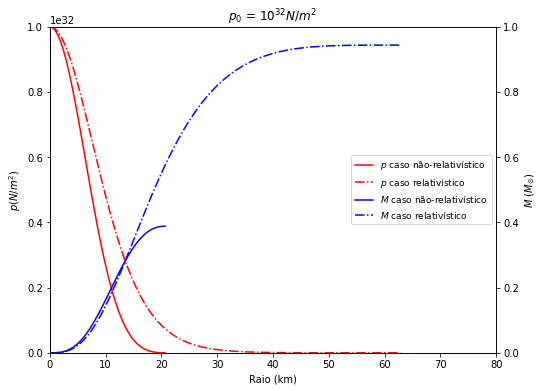

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{32} N/m^2$')
lns1 = ax.plot(df_32_naorel['R (km)'],df_32_naorel['pbar'],color ='red', linestyle='-', label = r'$p$ caso não-relativístico')
lns2 = ax.plot(df_32_rel['R (km)'],df_32_rel['pbar'],color ='red', linestyle='-.', label = r'$p$ caso relativístico')
ax.set_ylabel(r'$p (N/m^2)$')
plt.ylim(0,1E+32)

ax2 = ax.twinx()
lns3 = ax2.plot(df_32_naorel['R (km)'],df_32_naorel['mbar (Msol)'],color ='blue', label = r'$M$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_32_rel['R (km)'],df_32_rel['mbar (Msol)'],color ='blue', label = r'$M$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$M$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,80)
plt.ylim(0,1)

fig.savefig('NS-32.png')

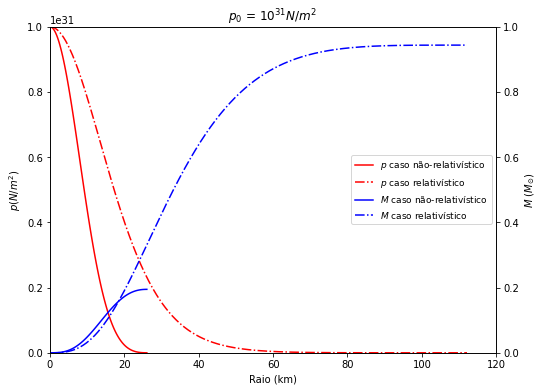

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{31} N/m^2$')
lns1 = ax.plot(df_31_naorel['R (km)'],df_31_naorel['pbar'],color ='red', linestyle='-', label = r'$p$ caso não-relativístico')
lns2 = ax.plot(df_31_rel['R (km)'],df_31_rel['pbar'],color ='red', linestyle='-.', label = r'$p$ caso relativístico')
ax.set_ylabel(r'$p (N/m^2)$')
plt.ylim(0,1E+31)

ax2 = ax.twinx()
lns3 = ax2.plot(df_31_naorel['R (km)'],df_31_naorel['mbar (Msol)'],color ='blue', label = r'$M$ caso não-relativístico',ls = '-')
lns4 = ax2.plot(df_31_rel['R (km)'],df_31_rel['mbar (Msol)'],color ='blue', label = r'$M$ caso relativístico',ls = '-.')

ax2.set_ylabel(r'$M$ $(M_{\odot})$')
ax.set_xlabel('Raio (km)')
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 5, prop={'size': 9})
plt.xlim(0,120)
plt.ylim(0,1)

fig.savefig('NS-31.png')